In [1]:
from bayestme import data

stdata = data.SpatialExpressionDataset.read_spaceranger("../A1_spaceranger_output")

In [27]:
from bayestme import gene_filtering

stddev_filtered = gene_filtering.select_top_genes_by_standard_deviation(
    stdata, n_gene=1000)

spot_threshold_filtered = gene_filtering.filter_genes_by_spot_threshold(
    stddev_filtered, spot_threshold=0.95)

stdata_filtered = gene_filtering.filter_ribosome_genes(spot_threshold_filtered)

In [31]:
stdata_filtered.gene_names

np.argmax(stdata_filtered.gene_names == 'BRAFhuman')

19

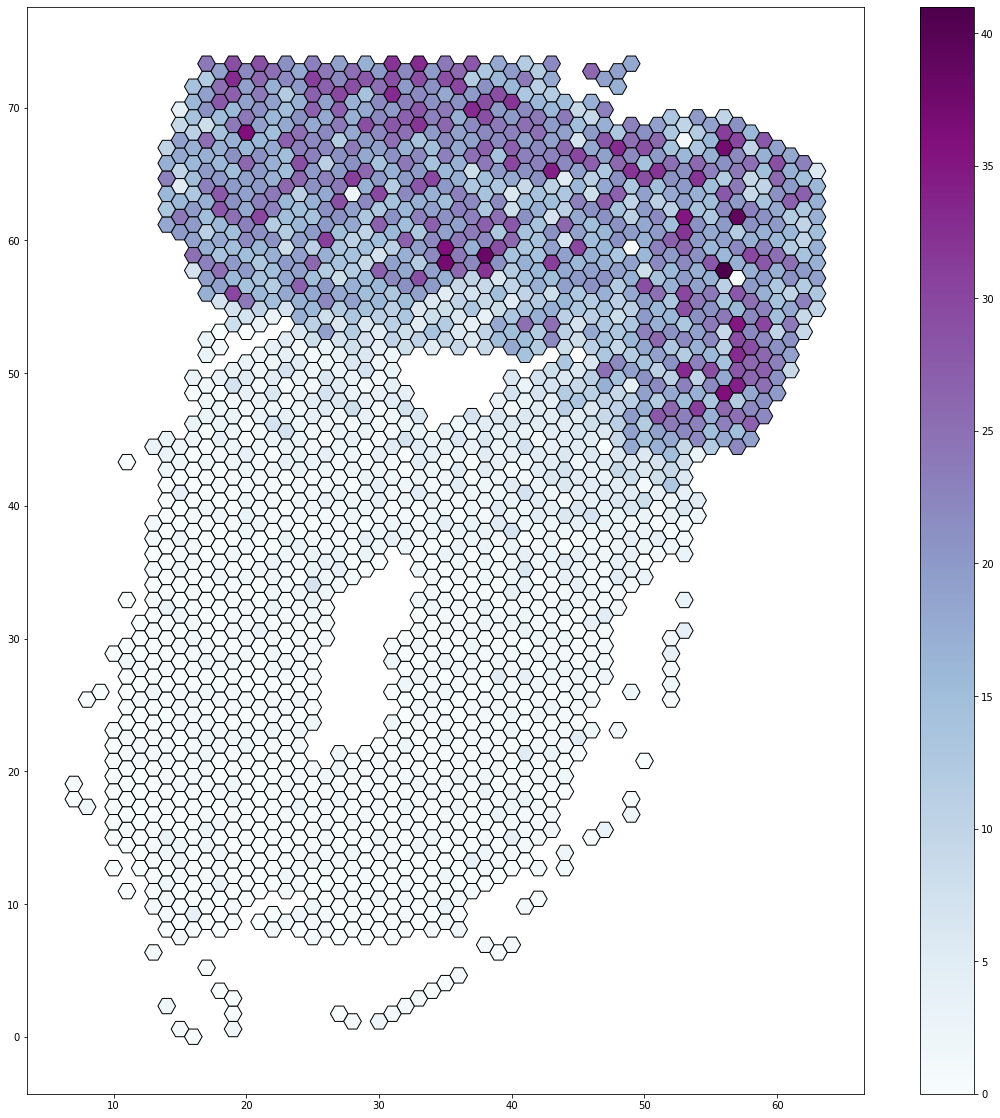

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.cm as cm
from matplotlib.colors import Normalize

from matplotlib.patches import RegularPolygon

from bayestme import data


def plot_hexagonal_grid(coords, values):
    cmap = cm.BuPu
    norm = Normalize(vmin=np.min(values), vmax=np.max(values))

    # Horizontal cartesian coords
    hcoord = coords[:, 0]

    # Vertical cartersian coords
    vcoord = (2. * np.sin(np.radians(60)) * (coords[:, 1]) / 3.)

    fig, ax = plt.subplots(1, figsize=(20,20))
    ax.set_aspect('equal')

    # Add some coloured hexagons
    for x, y, v in zip(hcoord, vcoord, values):
        hex = RegularPolygon(
            (x, y),
            numVertices=6,
            radius=2. / 3.,
            orientation=np.radians(30),
            facecolor=cmap(norm(v)),
            alpha=1,
            edgecolor='k')
        ax.add_patch(hex)
        
    ax.scatter(hcoord, vcoord, alpha=0.0)
    fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)

    plt.show()

counts = stdata_filtered.raw_counts[:, 19]

counts = counts[stdata_filtered.tissue_mask]
positions = stdata_filtered.positions.T[stdata_filtered.tissue_mask, :]
plot_hexagonal_grid(positions, counts)




In [37]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.cm as cm
from matplotlib.colors import Normalize

from matplotlib.patches import RegularPolygon

from bayestme import data
import math

def plot_square_grid(coords, values):
    cmap = cm.BuPu
    norm = Normalize(vmin=np.min(values), vmax=np.max(values))

    # Horizontal cartesian coords
    hcoord = coords[:, 0]

    # Vertical cartersian coords
    vcoord = coords[:, 1]

    fig, ax = plt.subplots(1)
    ax.set_aspect('equal')
    
    packing_radius = math.sqrt(2)/2.0

    for x, y, v in zip(hcoord, vcoord, values):
        sq = RegularPolygon(
            (x, y),
            numVertices=4,
            radius=math.sqrt(2)/2,
            orientation=np.radians(45),
            facecolor=cmap(norm(v)),
            alpha=1,
            edgecolor='k')
        ax.add_patch(sq)

    ax.scatter(hcoord, vcoord, alpha=0.0)
    fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
    plt.show()

In [38]:
from bayestme import bleeding_correction, data
import numpy as np

locations, tissue_mask, true_rates, true_counts, bleed_counts = bleeding_correction.generate_data(
        n_rows=12,
        n_cols=12,
        n_genes=5)

dataset = data.SpatialExpressionDataset(
        raw_counts=bleed_counts,
        tissue_mask=tissue_mask,
        positions=locations.T,
        gene_names=np.array(['1', '2', '3', '4', '5']),
        layout=data.Layout.SQUARE
    )

0
100


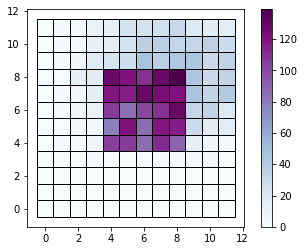

In [41]:
counts = dataset.raw_counts[:, 0]

counts = counts
positions = dataset.positions.T
fig = plot_square_grid(positions, counts)

plt.show(fig)